# Installation of PySpark

In [ ]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 49 kB/s 
     |████████████████████████████████| 199 kB 54.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=c78054bbebd45c82b65b4b747689e82719e3e6b7ce9059b033afd6fe69f28c6d
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
! ls

sample_data


# Answer 1: Import the data [covid-19.csv] using inferred schema. Log the time taken to import.

###### I have kept all my files including csv files of this assignment. To import that files in this coleb I have to connect with my google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### csv files in my google drive

In [ ]:
! ls drive/MyDrive/01-BDAT/2nd\ semester/Data\ collection\ and\ curation/assignment\ 1

'BDAT1008-2022F-Assignment 1.docx'   country.csv   covid-19.csv


# Copy csv file to google colab from google drive

In [ ]:
! cp drive/MyDrive/01-BDAT/2nd\ semester/Data\ collection\ and\ curation/assignment\ 1/country.csv country.csv

In [ ]:
!  cp drive/MyDrive/01-BDAT/2nd\ semester/Data\ collection\ and\ curation/assignment\ 1/covid-19.csv covid-19.csv

In [ ]:
! ls

country.csv  covid-19.csv  drive  sample_data


# Start of spark session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.Builder().getOrCreate()
spark

# Answer 2: Define the schema and then import the data using your defined schema. Log the time taken to import

In [ ]:
from pyspark.sql.types import *
country_schema = StructType([
    StructField("country", StringType(), True),
    StructField("continent", StringType(), True)
    ])
covid_schema = StructType([
    StructField("date", TimestampType(), True),
    StructField("country", StringType(), True),
    StructField("cumulative_total_cases", IntegerType(), True),
    StructField("daily_new_cases", FloatType(), True),
    StructField("active_cases", FloatType(), True),
    StructField("cumulative_total_deaths", FloatType(), True),
    StructField("daily_new_deaths", FloatType(), True),
    ])



In [ ]:
sp_country = spark.read.csv("country.csv",header=True,schema=country_schema)
sp_country.show(5) 

+-----------+---------+
|    country|continent|
+-----------+---------+
|Afghanistan|     Asia|
|    Albania|   Europe|
|    Algeria|   Africa|
|    Andorra|   Europe|
|     Angola|   Africa|
+-----------+---------+
only showing top 5 rows



In [ ]:
sp_country.printSchema()

root
 |-- country: string (nullable = true)
 |-- continent: string (nullable = true)



In [ ]:
sp_covid = spark.read.csv("covid-19.csv",header=True,schema = covid_schema)
sp_covid.show(5)

+-------------------+-----------+----------------------+---------------+------------+-----------------------+----------------+
|               date|    country|cumulative_total_cases|daily_new_cases|active_cases|cumulative_total_deaths|daily_new_deaths|
+-------------------+-----------+----------------------+---------------+------------+-----------------------+----------------+
|2020-02-15 00:00:00|Afghanistan|                     0|           null|         0.0|                    0.0|            null|
|2020-02-16 00:00:00|Afghanistan|                     0|           null|         0.0|                    0.0|            null|
|2020-02-17 00:00:00|Afghanistan|                     0|           null|         0.0|                    0.0|            null|
|2020-02-18 00:00:00|Afghanistan|                     0|           null|         0.0|                    0.0|            null|
|2020-02-19 00:00:00|Afghanistan|                     0|           null|         0.0|                    0.0|  

In [ ]:
sp_covid.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- country: string (nullable = true)
 |-- cumulative_total_cases: integer (nullable = true)
 |-- daily_new_cases: float (nullable = true)
 |-- active_cases: float (nullable = true)
 |-- cumulative_total_deaths: float (nullable = true)
 |-- daily_new_deaths: float (nullable = true)



# Question 3 : Would you recommend creating a schema first before importing the data? Why?


# Answer 3: It is helpful to create schema while importing data as it gives opportunity to set data types of each variable manually.

# Answer : 4 Provide summary statistics on the dataset

In [ ]:
sp_covid.describe().show()
sp_country.describe().show()

+-------+-----------+----------------------+------------------+-----------------+-----------------------+------------------+
|summary|    country|cumulative_total_cases|   daily_new_cases|     active_cases|cumulative_total_deaths|  daily_new_deaths|
+-------+-----------+----------------------+------------------+-----------------+-----------------------+------------------+
|  count|     184787|                184787|            174329|           166747|                 178227|            157850|
|   mean|       null|     725108.8640434663|2987.6332853397885|62392.82505232478|     13885.998125985401|  39.8318340196389|
| stddev|       null|     3681471.361327732|17803.232663111467|395564.1378092467|      60495.21047198393|181.10276967779453|
|    min|Afghanistan|                     0|            -322.0|         -14321.0|                    0.0|             -39.0|
|    max|   Zimbabwe|              84209473|          909610.0|      1.7935434E7|              1026646.0|            5093.0|


In [ ]:
sp_covid.createOrReplaceGlobalTempView('covid')

# Answer 5: Identify the top 10 countries suffering from covid-19 (you will define the criteria, whether based on death ratio, or total confirmed cases, etc.).


In [ ]:
spark.sql("select country, max(cumulative_total_cases) from global_temp.covid group by country order by max(cumulative_total_cases) desc limit 10").show()

+-----------+---------------------------+
|    country|max(cumulative_total_cases)|
+-----------+---------------------------+
|        USA|                   84209473|
|      India|                   43121599|
|     Brazil|                   30682094|
|     France|                   29160802|
|    Germany|                   25774509|
|         UK|                   22159805|
|     Russia|                   18255337|
|South Korea|                   17756627|
|      Italy|                   17030711|
|     Turkey|                   15053168|
+-----------+---------------------------+



In [ ]:
spark.sql("select country, sum(daily_new_cases) from global_temp.covid group by country order by sum(daily_new_cases) desc limit 10").show()

+-----------+--------------------+
|    country|sum(daily_new_cases)|
+-----------+--------------------+
|        USA|         8.4209458E7|
|      India|         4.3121596E7|
|     Brazil|         3.0682093E7|
|     France|          2.916079E7|
|    Germany|         2.5774493E7|
|         UK|         2.2159772E7|
|     Russia|         1.8255335E7|
|South Korea|         1.7756599E7|
|      Italy|         1.7030708E7|
|     Turkey|         1.5053165E7|
+-----------+--------------------+



In [ ]:
spark.sql("select country, max(cumulative_total_deaths) from global_temp.covid group by country order by max(cumulative_total_deaths) desc limit 10").show()

+---------+----------------------------+
|  country|max(cumulative_total_deaths)|
+---------+----------------------------+
|      USA|                   1026646.0|
|   Brazil|                    664920.0|
|    India|                    524214.0|
|   Russia|                    377571.0|
|   Mexico|                    324465.0|
|     Peru|                    213023.0|
|       UK|                    176708.0|
|    Italy|                    165182.0|
|Indonesia|                    156453.0|
|   France|                    147257.0|
+---------+----------------------------+



In [ ]:
spark.sql("select country, sum(daily_new_deaths) from global_temp.covid group by country order by sum(daily_new_deaths) desc limit 10").show()

+---------+---------------------+
|  country|sum(daily_new_deaths)|
+---------+---------------------+
|      USA|            1026646.0|
|   Brazil|             664920.0|
|    India|             524214.0|
|   Russia|             377571.0|
|   Mexico|             324463.0|
|     Peru|             213020.0|
|       UK|             176708.0|
|    Italy|             165182.0|
|Indonesia|             156453.0|
|   France|             147256.0|
+---------+---------------------+



# Answer 6: For the 10 countries indentified in 5, plot the line charts to show the trend of deaths from Jan 22, 2020 to May 14, 2022. Your horizontal axis should be the date.

In [ ]:
import pandas as pd
df = spark.sql("""SELECT date, country, daily_new_deaths
            FROM global_temp.covid 
            WHERE country IN ('USA','Brazil','India','Russia','Mexico','Peru','UK','Italy','Indonesia','France')
            AND date between "2020-01-22 00:00:00" AND "2022-05-14 00:00:00"
            """).toPandas()

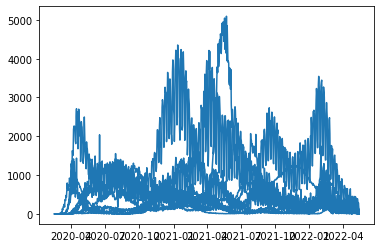

In [ ]:
from matplotlib import legend
import matplotlib.pyplot as plt
import numpy as np

x = df['date']
y = df['daily_new_deaths']

plt.plot(df['date'], df['daily_new_deaths'])



# Answer 7: For each country and date, calculate cumulative recovered cases. Formula: cumulative recovered cases = cumulative_total_cases - active_cases - cumulative_total_deaths.

# cumulative_recovered_cases by country

In [ ]:
cumulative_recovered_cases_country = spark.sql("""SELECT country, sum(cumulative_total_cases - active_cases - cumulative_total_deaths) as cumulative_recovered_cases,max(cumulative_total_cases)
              FROM global_temp.covid 
              group by country
              """).show()

+-------------------+--------------------------+---------------------------+
|            country|cumulative_recovered_cases|max(cumulative_total_cases)|
+-------------------+--------------------------+---------------------------+
|China Hong Kong Sar|                      null|                    1208247|
|               Chad|                 2467083.0|                       7414|
|           Anguilla|                  450223.0|                       2984|
|           Paraguay|              1.97642941E8|                     649718|
|             Russia|             4.102771379E9|                   18255337|
|    China Macao Sar|                      null|                         82|
|         Cabo Verde|               1.8347389E7|                      56105|
|           Kiribati|                  210438.0|                       3093|
|             Guyana|               1.4920968E7|                      63804|
|            Eritrea|                 3067316.0|                       9745|

#cumulative_recovered_cases by date

In [ ]:
spark.sql("""SELECT date, sum(cumulative_total_cases - active_cases - cumulative_total_deaths) as cumulative_recovered_cases 
              FROM global_temp.covid 
              group by date
              """).show()

+-------------------+--------------------------+
|               date|cumulative_recovered_cases|
+-------------------+--------------------------+
|2020-03-31 00:00:00|                  185740.0|
|2020-07-13 00:00:00|                 8558378.0|
|2021-07-08 00:00:00|              1.67405132E8|
|2021-07-20 00:00:00|              1.71720224E8|
|2021-08-27 00:00:00|              1.89971766E8|
|2022-01-03 00:00:00|              2.52727059E8|
|2022-04-07 00:00:00|               4.3044278E8|
|2020-04-11 00:00:00|                  522402.0|
|2020-04-12 00:00:00|                  560066.0|
|2020-05-13 00:00:00|                 2169393.0|
|2021-12-13 00:00:00|              2.40841195E8|
|2022-01-02 00:00:00|              2.52031577E8|
|2020-09-05 00:00:00|               2.0058918E7|
|2021-07-06 00:00:00|              1.66678285E8|
|2022-05-01 00:00:00|              4.52512627E8|
|2020-06-11 00:00:00|                 4629059.0|
|2022-02-25 00:00:00|               3.6767831E8|
|2020-06-19 00:00:00

# Answer 8 : Plot the trend of the recovery rate (cumulative recovered cases / cumulative_total_cases) for the period Jan 22, 2020 to May 14, 2022. Your horizontal axis should be the date. Which 5 countries have a relatively higher recovery rate?

In [ ]:
spark.sql("""SELECT country, sum(cumulative_total_cases - active_cases - cumulative_total_deaths)/max(cumulative_total_cases) as recovery_rate
              FROM global_temp.covid 
              group by country
              Order by recovery_rate desc
              Limit 5
              """).show()

+--------------+------------------+
|       country|     recovery_rate|
+--------------+------------------+
|Western Sahara|             592.0|
|    Tajikistan| 541.5786749482402|
|      Djibouti| 440.5144904356727|
|  Saudi Arabia|419.53141098715724|
|         Ghana| 401.6697482638889|
+--------------+------------------+



In [ ]:
spark.sql("""SELECT country, sum(cumulative_total_cases - active_cases - cumulative_total_deaths)/max(cumulative_total_cases) as recovery_rate
              FROM global_temp.covid 
              group by country
              Order by recovery_rate desc
              Limit 5
              """).show()

+--------------+------------------+
|       country|     recovery_rate|
+--------------+------------------+
|Western Sahara|             592.0|
|    Tajikistan| 541.5786749482402|
|      Djibouti| 440.5144904356727|
|  Saudi Arabia|419.53141098715724|
|         Ghana| 401.6697482638889|
+--------------+------------------+



In [ ]:
Western_Sahara = spark.sql("""SELECT (cumulative_total_cases - active_cases - cumulative_total_deaths)/cumulative_total_cases as recovery_rate, date
              FROM global_temp.covid 
              where country = 'Western Sahara'
              order by recovery_rate desc
              """)
Tajikistan = spark.sql("""SELECT country, (cumulative_total_cases - active_cases - cumulative_total_deaths)/cumulative_total_cases as recovery_rate, date
              FROM global_temp.covid 
              where country = 'Tajikistan'
              order by recovery_rate desc
              """)
Djibouti = spark.sql("""SELECT country, (cumulative_total_cases - active_cases - cumulative_total_deaths)/cumulative_total_cases as recovery_rate, date
              FROM global_temp.covid 
              where country = 'Djibouti'
              order by recovery_rate desc
              """)
Saudi_Arabia = spark.sql("""SELECT country, (cumulative_total_cases - active_cases - cumulative_total_deaths)/cumulative_total_cases as recovery_rate, date
              FROM global_temp.covid 
              where country = 'Saudi Arabia'
              order by recovery_rate desc
              """)
Ghana = spark.sql("""SELECT country, (cumulative_total_cases - active_cases - cumulative_total_deaths)/cumulative_total_cases as recovery_rate, date
              FROM global_temp.covid 
              where country = 'Ghana'
              order by recovery_rate desc
              """)



TypeError: ignored

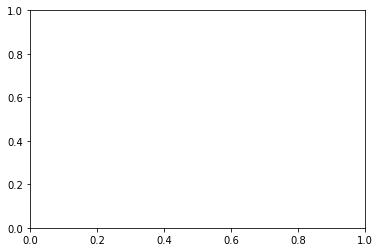

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Western_Sahara['date'], Western_Sahara['recovery_rate'])
plt.plot(Tajikistan['date'], Tajikistan['recovery_rate'])
plt.plot(Djibouti['date'], Djibouti['recovery_rate'])
plt.plot(Saudi_Arabia['date'], Saudi_Arabia['recovery_rate'])
plt.plot(Ghana['date'], Ghana['recovery_rate'])



# Answer 9 : As of May 14, 2022, aggregate the cumulative_total_cases, deaths, recovered cases and active cases group by continent. Hint: Utilize country.csv and the covid dataset.

In [ ]:
sp_country.createOrReplaceGlobalTempView('country')

In [ ]:
spark.sql("""SELECT country.continent , sum(covid.active_cases) as active_cases 
                    ,sum(covid.daily_new_cases) as new_cases
                    ,sum(covid.cumulative_total_cases) as cumulative_total_cases
                    ,sum(covid.cumulative_total_cases - covid.active_cases - covid.cumulative_total_deaths) As Recovery
              FROM global_temp.covid AS covid
              LEFT JOIN global_temp.country AS country
              ON covid.country = country.country
              WHERE covid.date = "2022-05-14 00:00:00"
              GROUP BY country.continent
              """).show()

+-----------------+------------+---------+----------------------+------------+
|        continent|active_cases|new_cases|cumulative_total_cases|    Recovery|
+-----------------+------------+---------+----------------------+------------+
|           Europe|   5917092.0| 125430.0|             194283695|1.70740686E8|
|           Africa|    497713.0|   8831.0|              12042289|  1.013714E7|
|Australia/Oceania|    460787.0|  57201.0|               7894793|   7350427.0|
|    North America|   3329115.0|  32493.0|              99625466| 9.4817997E7|
|    South America|    610922.0|  22807.0|              57131796| 5.1027676E7|
|             Asia|   3205440.0| 167821.0|             149855156|1.26081385E8|
+-----------------+------------+---------+----------------------+------------+



# Answer 10 : Which 5 countries have the highest growth rate on cumulative_total_cases 6 months after the 1st positive case was detected within the country?

In [ ]:
spark.sql("""SELECT country, cumulative_total_cases, date
            FROM global_temp.covid
            WHERE date IN (SELECT min(dateadd(month,6,date)) FROM global_temp.covid WHERE country IN (SELECT distinct country FROM global_temp.covid))
            ORDER BY cumulative_total_cases desc
            LIMIT 5""").show()

+-------+----------------------+-------------------+
|country|cumulative_total_cases|               date|
+-------+----------------------+-------------------+
|    USA|               4219424|2020-07-22 00:00:00|
| Brazil|               2244342|2020-07-22 00:00:00|
|  India|               1239684|2020-07-22 00:00:00|
| Russia|                789190|2020-07-22 00:00:00|
| Turkey|                604943|2020-07-22 00:00:00|
+-------+----------------------+-------------------+



# Answer 11 : For step 9, export the results to a JSON file

```
# This is formatted as code
```



In [ ]:
spark.sql("""SELECT country.continent , sum(covid.active_cases)
              FROM global_temp.covid AS covid
              LEFT JOIN global_temp.country AS country
              ON covid.country = country.country
              WHERE covid.date = "2022-05-14 00:00:00"
              GROUP BY country.continent
              """).toPandas().to_json("json_file.json")

In [ ]:
! ls

country.csv  covid-19.csv  drive  json_file.json  sample_data  spark-warehouse
